In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

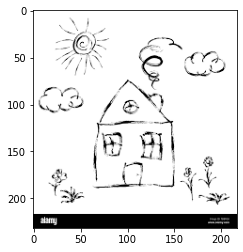

In [5]:
# img= image.load_img("C:/Users/win10/Desktop/basedata/training/house/1.png")
# plt.imshow(img)

In [8]:
# cv2.imread("C:/Users/win10/Desktop/basedata/training/house/1.png")
# cv2.imread("C:/Users/win10/Desktop/basedata/training/house/1.png").shape
# (232, 217, 3)

(232, 217, 3)

In [9]:
train = ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [41]:
train_dataset = train.flow_from_directory('C:/Users/win10/Desktop/basedata/training/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode='binary')
validation_dataset = train.flow_from_directory('C:/Users/win10/Desktop/basedata/validating/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode='binary')
train_dataset.class_indices
# train_dataset.classes

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


{'house': 0, 'human': 1}

In [42]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   #
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                    #
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [43]:
model.compile(loss = 'binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [44]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=30,
                   validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 5s 853ms/step - loss: 13.2499 - accuracy: 0.6667 - val_loss: 1.0169 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 2s 633ms/step - loss: 1.8392 - accuracy: 0.6250 - val_loss: 1.3477 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 2s 644ms/step - loss: 1.2037 - accuracy: 0.2500 - val_loss: 0.7233 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 2s 631ms/step - loss: 0.7665 - accuracy: 0.2500 - val_loss: 0.7466 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 2s 624ms/step - loss: 0.9170 - accuracy: 0.2500 - val_loss: 0.7214 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 2s 612ms/step - loss: 0.6904 - accuracy: 0.5556 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 2s 606ms/step - loss: 1.9382 - accuracy: 0.3750 - val_loss: 0.6653 - val_accuracy: 0.6500
Epoch 8/30
3/3 [===

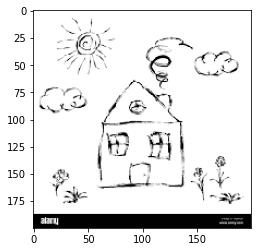

1/1 [==============================] - 0s 83ms/step
its house


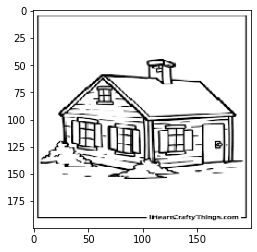

1/1 [==============================] - 0s 56ms/step
its house


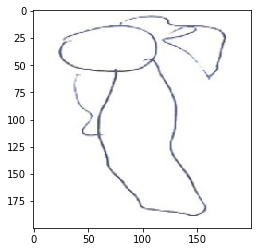

1/1 [==============================] - 0s 80ms/step
its human


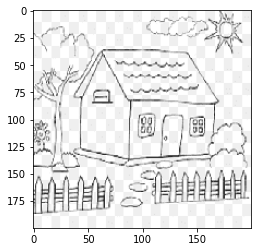

1/1 [==============================] - 0s 71ms/step
its house


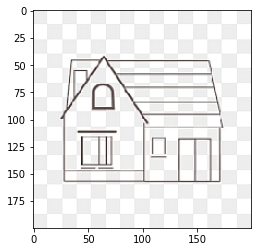

1/1 [==============================] - 0s 84ms/step
its house


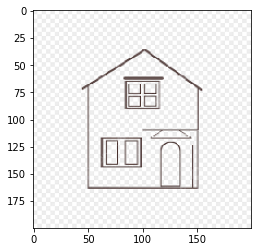

1/1 [==============================] - 0s 68ms/step
its house


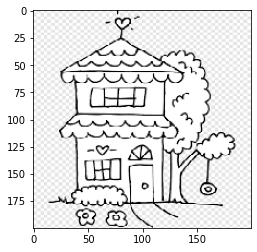

1/1 [==============================] - 0s 51ms/step
its house


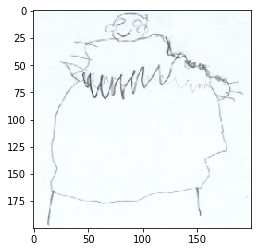

1/1 [==============================] - 0s 50ms/step
its human


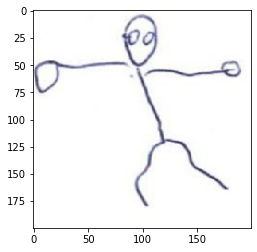

1/1 [==============================] - 0s 48ms/step
its human


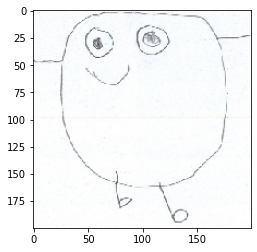

1/1 [==============================] - 0s 55ms/step
its human


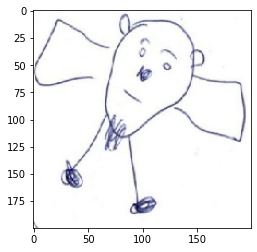

1/1 [==============================] - 0s 58ms/step
its human


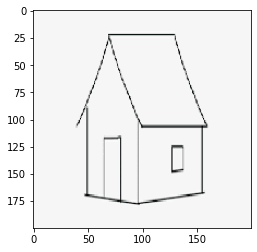

1/1 [==============================] - 0s 58ms/step
its house


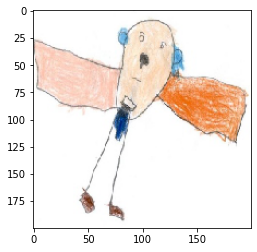

1/1 [==============================] - 0s 52ms/step
its human


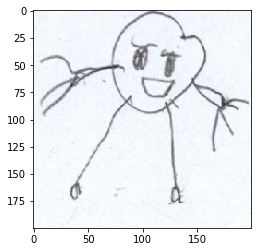

1/1 [==============================] - 0s 76ms/step
its human


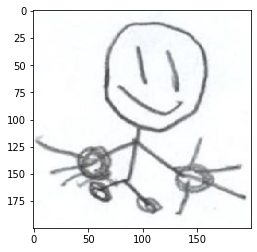

1/1 [==============================] - 0s 51ms/step
its human


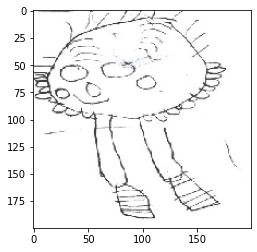

1/1 [==============================] - 0s 59ms/step
its human


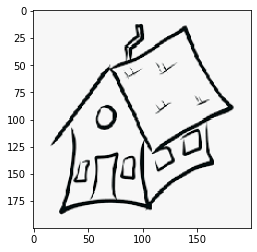

1/1 [==============================] - 0s 59ms/step
its house


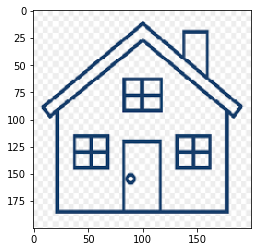

1/1 [==============================] - 0s 61ms/step
its house


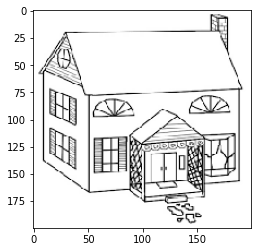

1/1 [==============================] - 0s 63ms/step
its house


In [49]:
dir_path = 'C:/Users/win10/Desktop/basedata/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images =np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("its house")
    elif val==1:
        print("its human")
    elif(val==1 and val==0):
        print("it has both human and house")
    else:
        print("nothing in the image")